In [16]:
#
# 前処理した時系列をセグメント別に書き出す処理
# 2022-11-8 Ofuji
# 課題：stdが0でなく十分小さい変数についても除外しておく必要あるか。202-11-15

# ドライブのマウント、カレントディレクトリの設定
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/地熱2')
!pwd

# pd.set_option('display.max_rows', None) # 全行表示したいとき

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/地熱2


In [2]:
!pwd

/content/drive/MyDrive/Colab Notebooks/地熱


In [3]:
##
## データの読み込み等
##

import pandas as pd
import numpy as np

# 作図モジュールインポート
import matplotlib.pyplot as plt
# 日本語表示関連
!pip install japanize-matplotlib
import japanize_matplotlib
japanize_matplotlib.japanize()


#df = pd.read_csv('df.csv') # dfはRから書き出したデータ
df_long = pd.read_csv('df_tate.csv') # タテ持ちデータ

# 変数数の確認
print(pd.unique(df_long["変数"]))
print(len(df_long["変数"].unique())) # 38変数

# dt列をdatetime型に
df_long['dt'] = pd.to_datetime(df_long['dt'])

# 縦持ちから横持ちへの変換
df_wide = df_long.pivot_table(values="値", index=["dt","変数"], columns="井戸")
df_wide.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=6b167f71609313250ab3c44993659f7eb1e55c47960d15326553766b801510ca
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib
['外注測定_蒸気CO2(wt%)' '外注測定_蒸気H2S(wt%)' '外注測定_蒸気NCG(wt%)' '外注測定_蒸気R(wt%)'
 '外注測定_熱水B' '外注測定_熱水Ca' '外注測定_熱水Cl' '外注測定_熱水EC' '外注測定_熱水K' '外注測定_熱水Mg'
 '外注測定_熱水Na' '外注測定_熱水pH' '外注測定_熱水SiO2' '外注測定_熱水SO4' '自社測定_蒸気NCG(wt%)'
 '自社測定_熱水Ca' '自社測定_熱水Cl' '自社測定_熱水EC' '自社測定_熱水Fe' '自社測定_熱水K' '自社測定_熱水Mn'
 '自社測定_熱水Na' '自社測定_熱水pH' '自社測定_熱水SiO2' '外注測定_熱水Al' '外注測定_熱水Fe'
 '外注測定_蒸気凝縮水Cl' '外注測定_蒸気凝縮水EC' '外注測定_蒸気凝縮水Fe' '外注測定_蒸気凝縮水Na'
 '外注測定_蒸気凝縮水pH' '外注測定_蒸気凝縮水SiO2' '外注測定_蒸気凝縮水SO4' '外注測定_蒸気凝縮水K' '自社測定_蒸気温度'
 '自社測定_蒸気過熱度' '自社測定_熱水濁度' '自社測定_熱水SO4']
38


井戸                    P1-06T  P1-14T  P1-15T  P1-21T  P1-23P  P1-28P  P1-31P  \
dt         変数                                                                  
2006-04-12 外注測定_熱水B      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
           外注測定_熱水Ca     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
           外注測定_熱水Cl     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
           外注測定_熱水EC     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
           外注測定_熱水K      NaN     NaN     NaN     NaN     NaN     NaN     NaN   

井戸                    P1-32P   P1-33P  P1-34P  ...  P1-37P  P1-38P  P1-40P  \
dt         変数                                  ...                           
2006-04-12 外注測定_熱水B      NaN    726.0     NaN  ...   131.0     NaN     NaN   
           外注測定_熱水Ca     NaN    996.0     NaN  ...   248.0     NaN     NaN   
           外注測定_熱水Cl     NaN  18800.0     NaN  ...  5280.0     NaN     NaN   
           外注測定_熱水EC     NaN     47.2     NaN  ...    15.6     NaN     NaN   
           外注測定_熱水K      NaN   2000.0     NaN  ...   675.0     NaN     NaN   

井戸                    P2-11T  P2-16T  P2-17T  P2-22T  P2-24P  P2-26P  P2-39P  
dt         変数                                                                 
2006-04-12 外注測定_熱水B      NaN     NaN     NaN     NaN     NaN     NaN     NaN  
           外注測定_熱水Ca     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
           外注測定_熱水Cl     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
           外注測定_熱水EC     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
           外注測定_熱水K      NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[5 rows x 22 columns]

In [4]:
# dtと井戸のマルチインデックスをバラす → 井戸・変数に対してヨコ持ちになる
df = df_wide.unstack()
print(df.head())  # この段階ではまだNaNばかり

# 行列のサイズ
print("行列のサイズは ", df.shape)

# 欠損値の数 (interpolate前)
print("欠損値の数 (interpolate前)： \n",df.isnull().sum())

井戸            P1-06T                                                   \
変数         外注測定_熱水Al 外注測定_熱水B 外注測定_熱水Ca 外注測定_熱水Cl 外注測定_熱水EC 外注測定_熱水Fe   
dt                                                                      
2006-04-12       NaN      NaN       NaN       NaN       NaN       NaN   
2006-04-13       NaN      NaN       NaN       NaN       NaN       NaN   
2006-04-20       NaN      NaN       NaN       NaN       NaN       NaN   
2006-04-21       NaN      NaN       NaN       NaN       NaN       NaN   
2006-05-18       NaN      NaN       NaN       NaN       NaN       NaN   

井戸                                                  ...   P2-39P            \
変数         外注測定_熱水K 外注測定_熱水Mg 外注測定_熱水Na 外注測定_熱水SO4  ... 自社測定_熱水K 自社測定_熱水Mn   
dt                                                  ...                      
2006-04-12      NaN       NaN       NaN        NaN  ...      NaN       NaN   
2006-04-13      NaN       NaN       NaN        NaN  ...      NaN       NaN   
2006-04-20      NaN      

In [5]:
##
## 欠損値の補完(interpolate)
##

# 欠損値の補完(interpolate)
df_i = df.interpolate( limit_direction = 'both', axis = 0 )
print(df_i.head())

# 欠損値の数 (interpolate後)
print("欠損値の数 (interpolate後)： \n", df_i.isnull().sum() )
# それでも完全になくなったわけではない
print("df_i全体でまだ残っている欠損： ", df_i.isnull().sum().sum() )

井戸            P1-06T                                                   \
変数         外注測定_熱水Al 外注測定_熱水B 外注測定_熱水Ca 外注測定_熱水Cl 外注測定_熱水EC 外注測定_熱水Fe   
dt                                                                      
2006-04-12      0.01    484.0      17.4     978.0      4.03       0.4   
2006-04-13      0.01    484.0      17.4     978.0      4.03       0.4   
2006-04-20      0.01    484.0      17.4     978.0      4.03       0.4   
2006-04-21      0.01    484.0      17.4     978.0      4.03       0.4   
2006-05-18      0.01    484.0      17.4     978.0      4.03       0.4   

井戸                                                  ...   P2-39P            \
変数         外注測定_熱水K 外注測定_熱水Mg 外注測定_熱水Na 外注測定_熱水SO4  ... 自社測定_熱水K 自社測定_熱水Mn   
dt                                                  ...                      
2006-04-12     56.0      4.15     795.0      337.0  ...   2100.0      25.0   
2006-04-13     56.0      4.15     795.0      337.0  ...   2100.0      25.0   
2006-04-20     56.0      

<Axes: title={'center': ' 06T 月でリサンプリング後、再度interpolation'}, xlabel='dt'>

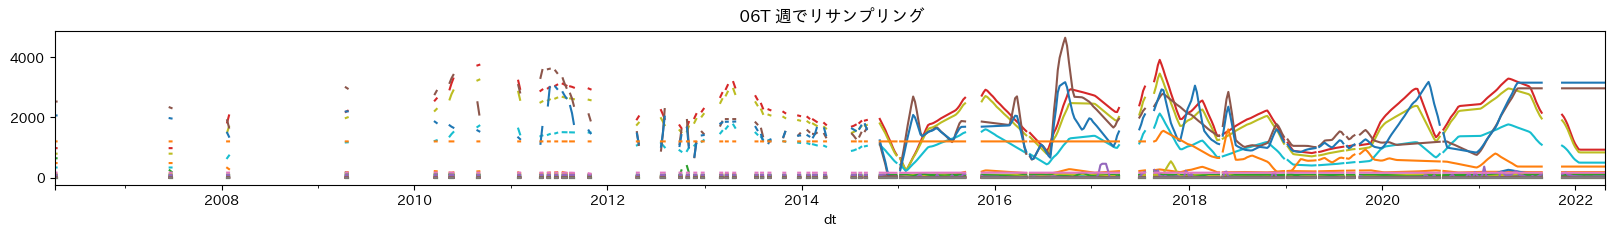

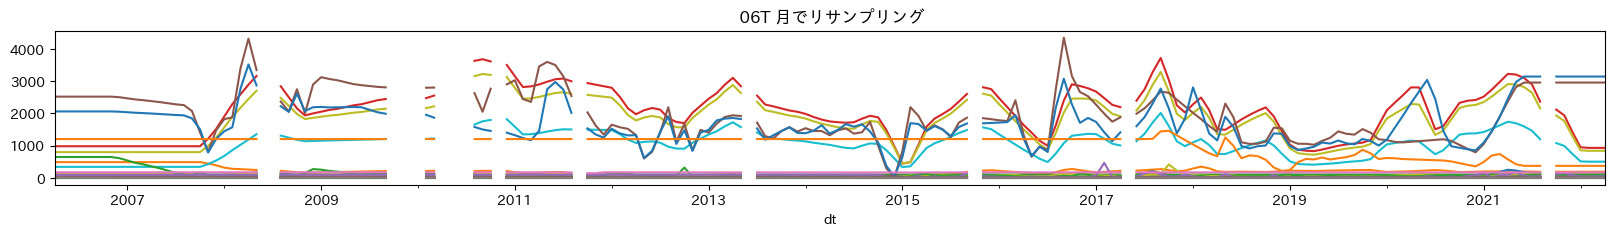

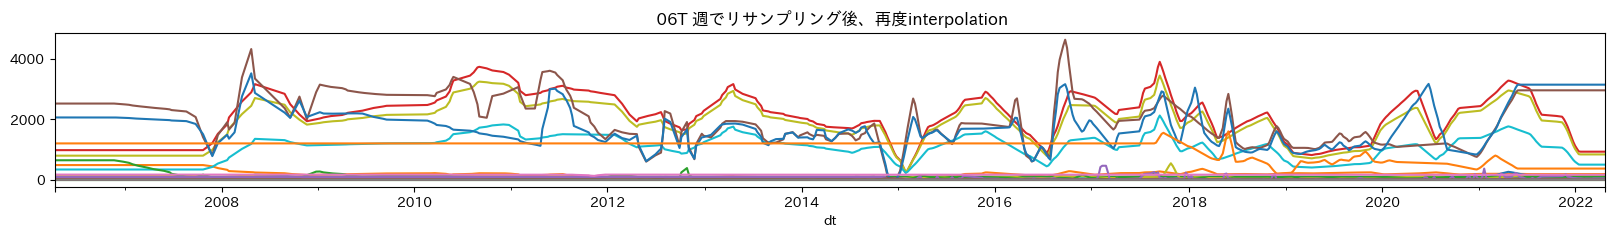

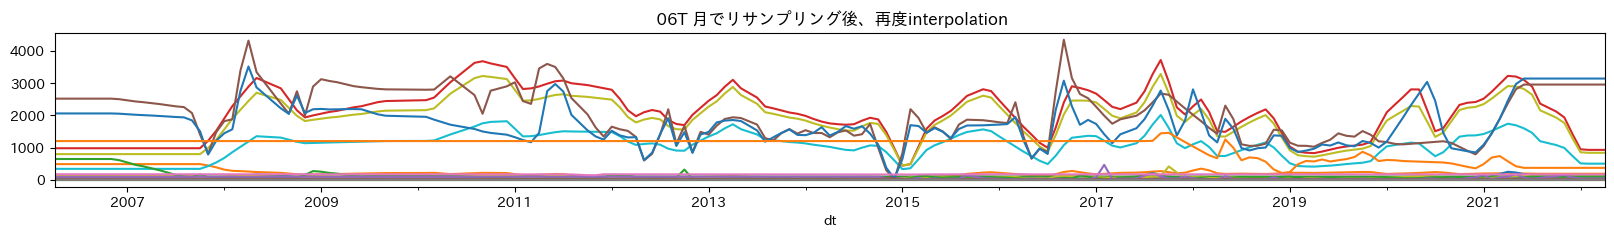

In [6]:

# 週や月でリサンプリングし、再度interpolationしてみるなどしてみる

df_i.resample("W").mean().loc[:,'P1-06T'].\
  plot(figsize=(20,2), legend = False, title = " 06T 週でリサンプリング" )

df_i.resample("M").mean().loc[:,'P1-06T'].\
  plot(figsize=(20,2), legend = False, title = " 06T 月でリサンプリング" )

df_i.resample("W").mean().loc[:,'P1-06T'].interpolate( limit_direction = 'both', axis = 0 ).\
  plot(figsize=(20,2), legend = False, title = " 06T 週でリサンプリング後、再度interpolation" )     # これ有望かな？

df_i.resample("M").mean().loc[:,'P1-06T'].interpolate( limit_direction = 'both', axis = 0 ).\
  plot(figsize=(20,2), legend = False, title = " 06T 月でリサンプリング後、再度interpolation" )


In [7]:
# 「06T 週でリサンプリング後、再度interpolation」したものの、欠損値の確認
print("行列のサイズは： ", df_i.resample("W").mean().loc[:,'P1-06T'].interpolate( limit_direction = 'both', axis = 0 ).shape)
print(df_i.resample("W").mean().loc[:,'P1-06T'].interpolate( limit_direction = 'both', axis = 0 ).isnull().sum())
print(df_i.resample("W").mean().loc[:,'P1-06T'].interpolate( limit_direction = 'both', axis = 0 ).isnull().sum().sum())
  # 「外注測定_蒸気凝縮水K」だけが、全数nullであるよう。 全数nullだとinteporalteできない

行列のサイズは：  (837, 38)
変数
外注測定_熱水Al            0
外注測定_熱水B             0
外注測定_熱水Ca            0
外注測定_熱水Cl            0
外注測定_熱水EC            0
外注測定_熱水Fe            0
外注測定_熱水K             0
外注測定_熱水Mg            0
外注測定_熱水Na            0
外注測定_熱水SO4           0
外注測定_熱水SiO2          0
外注測定_熱水pH            0
外注測定_蒸気CO2(wt%)      0
外注測定_蒸気H2S(wt%)      0
外注測定_蒸気NCG(wt%)      0
外注測定_蒸気R(wt%)        0
外注測定_蒸気凝縮水Cl         0
外注測定_蒸気凝縮水EC         0
外注測定_蒸気凝縮水Fe         0
外注測定_蒸気凝縮水K        837
外注測定_蒸気凝縮水Na         0
外注測定_蒸気凝縮水SO4        0
外注測定_蒸気凝縮水SiO2       0
外注測定_蒸気凝縮水pH         0
自社測定_熱水Ca            0
自社測定_熱水Cl            0
自社測定_熱水EC            0
自社測定_熱水Fe            0
自社測定_熱水K             0
自社測定_熱水Mn            0
自社測定_熱水Na            0
自社測定_熱水SO4           0
自社測定_熱水SiO2          0
自社測定_熱水pH            0
自社測定_熱水濁度            0
自社測定_蒸気NCG(wt%)      0
自社測定_蒸気温度            0
自社測定_蒸気過熱度           0
dtype: int64
837


In [8]:
##
## データフレームの最初から最後まで変化しない変数（ゼロ分散変数）を削除する　そうしないと異常検知のプログラムでエラーが出たり、異常検知に影響出る可能性あり
##

df_i_z = df_i.resample("W").mean().interpolate( limit_direction = 'both', axis = 0 )

print("ゼロ分散変数の削除前： ", df_i_z.shape)

for col in df_i_z.columns:
    if len(df_i_z[col].unique()) == 1:
        df_i_z.drop(col, inplace = True, axis = 1)

print("ゼロ分散変数の削除後： ", df_i_z.shape)

ゼロ分散変数の削除前：  (837, 836)
ゼロ分散変数の削除後：  (837, 752)


<Axes: title={'center': ' 06T'}, xlabel='dt'>

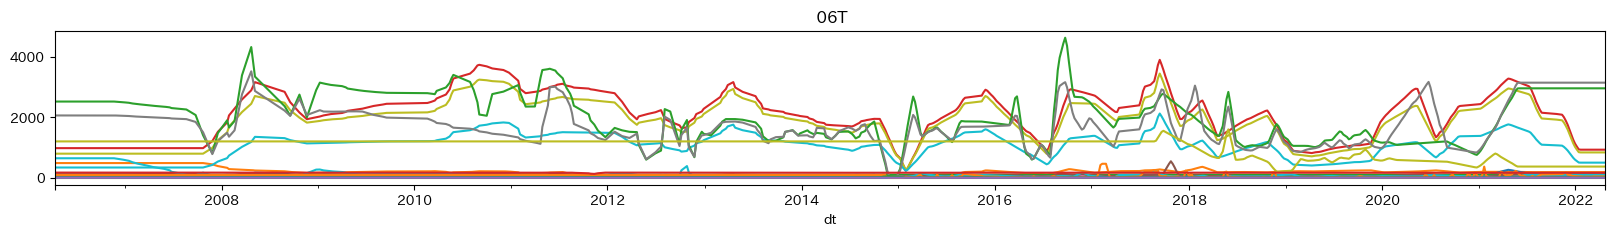

In [9]:
df_i_z.loc[:, "P1-06T"].plot(figsize=(20,2), legend = False, title = " 06T" )

In [10]:
##
## 各井戸に関してループ処理
##

# 井戸名称のリストを得ておく
wells = []
for i in range(0, len(df_i_z.columns), 1):
  wells.append(df_i_z.columns[i][0])

wells = np.unique(wells)
print(wells)

['P1-06T' 'P1-14T' 'P1-15T' 'P1-21T' 'P1-23P' 'P1-28P' 'P1-31P' 'P1-32P'
 'P1-33P' 'P1-34P' 'P1-35P' 'P1-36P' 'P1-37P' 'P1-38P' 'P1-40P' 'P2-11T'
 'P2-16T' 'P2-17T' 'P2-22T' 'P2-24P' 'P2-26P' 'P2-39P']


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


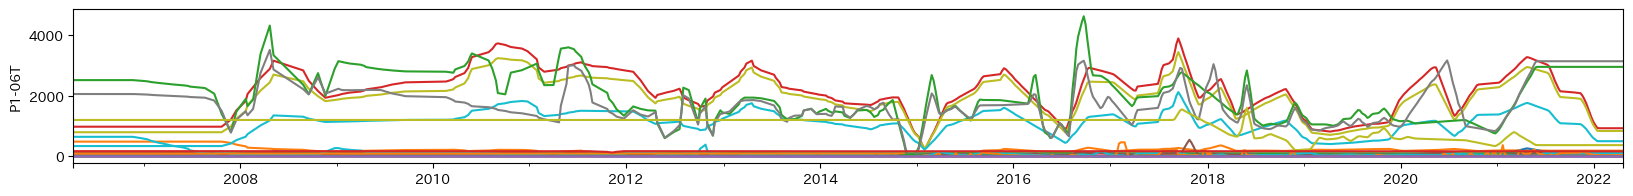

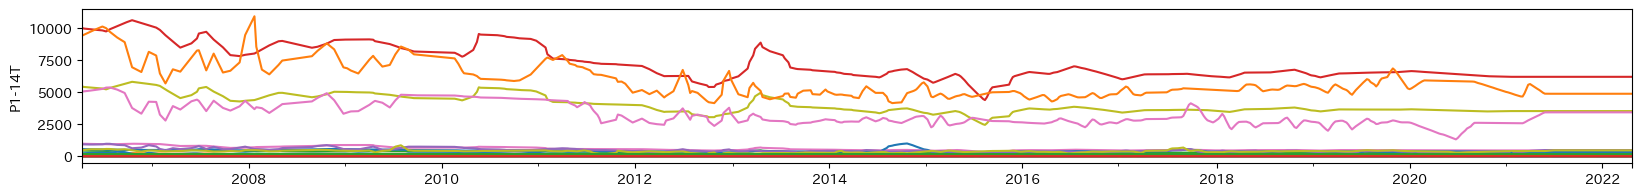

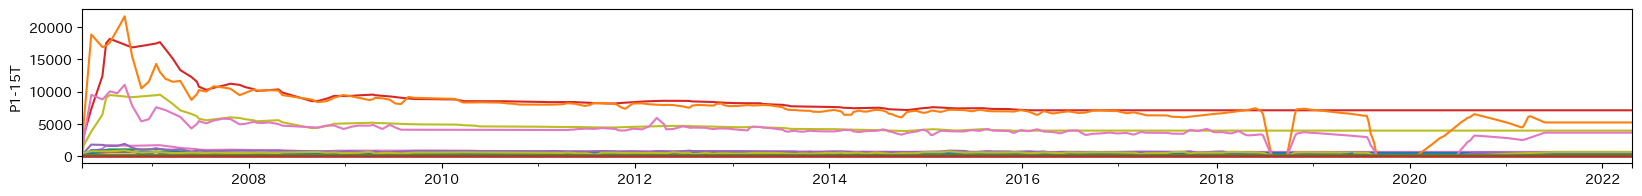

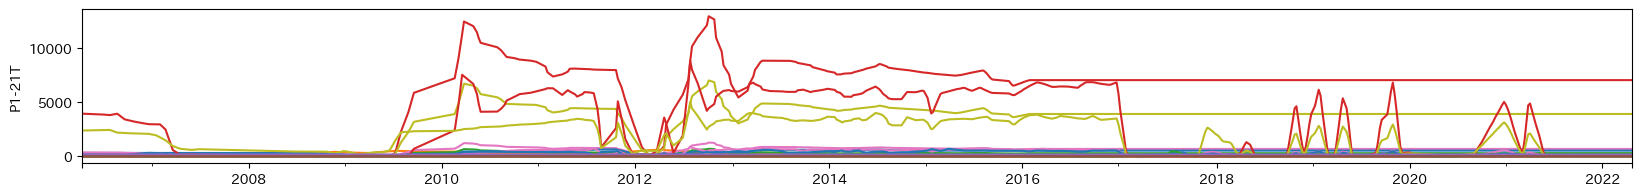

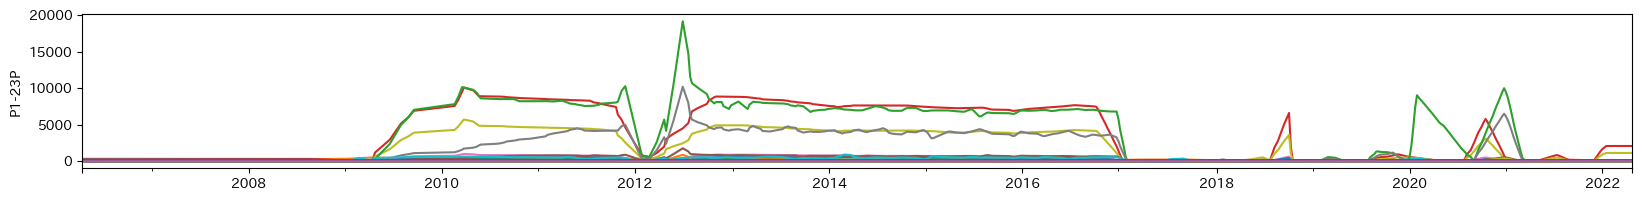

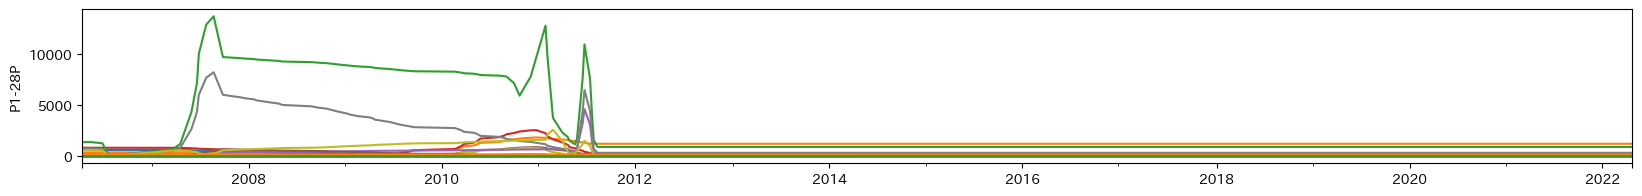

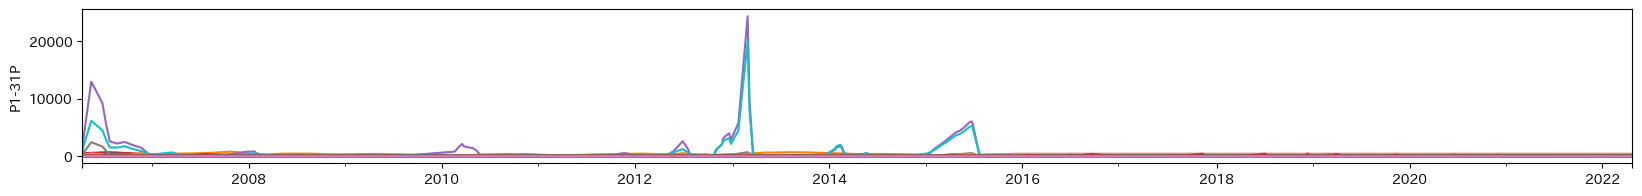

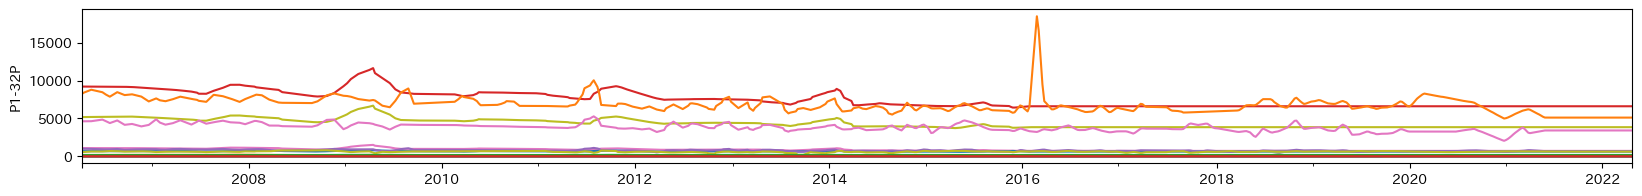

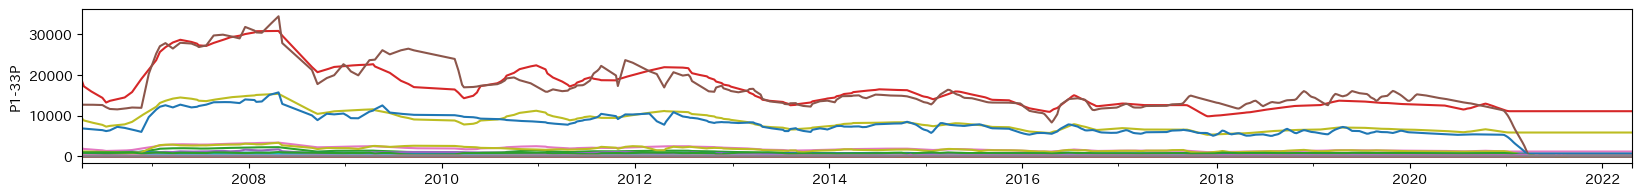

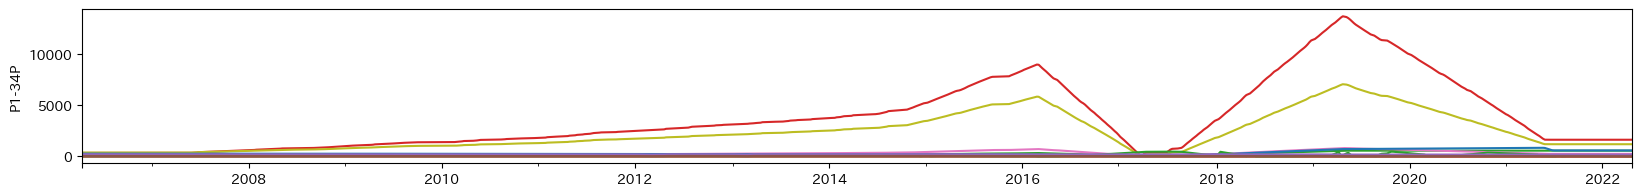

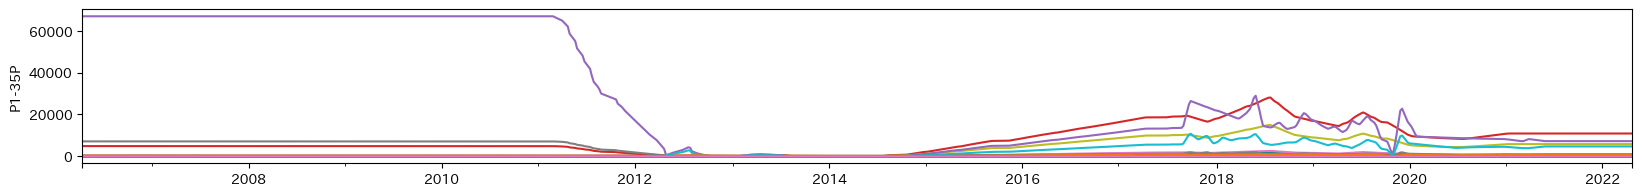

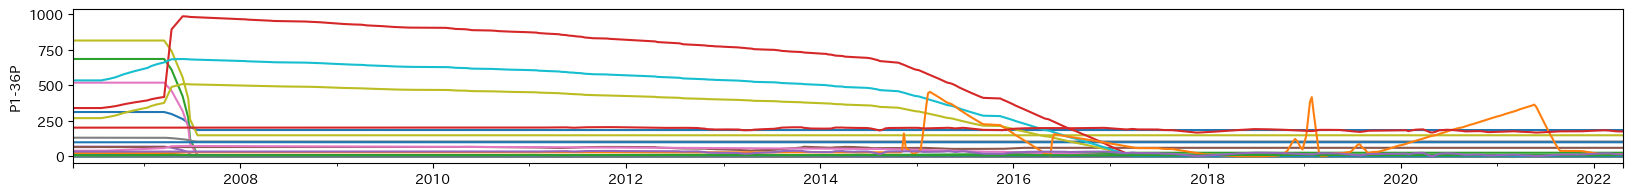

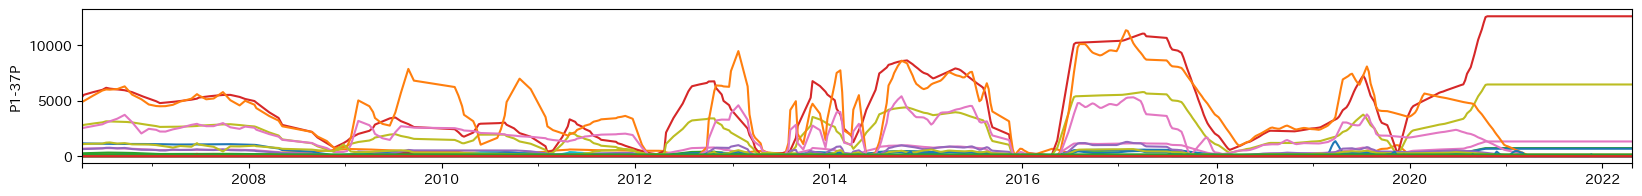

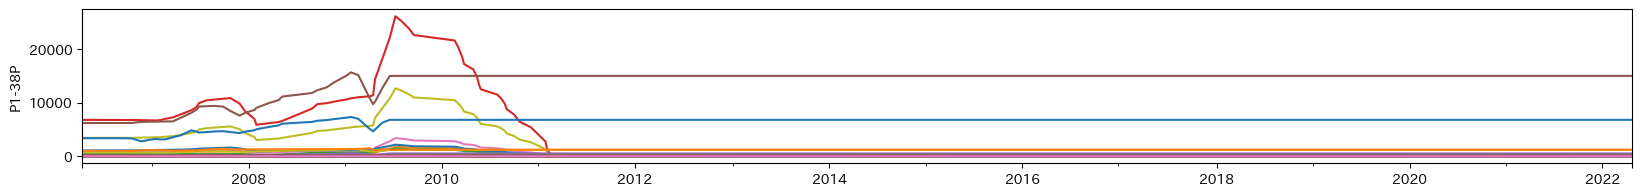

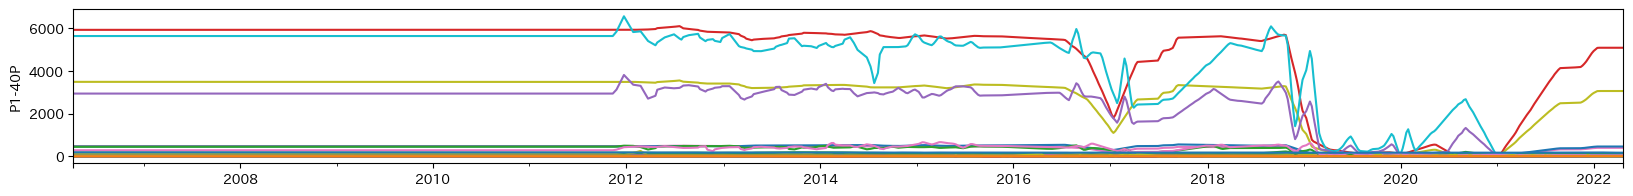

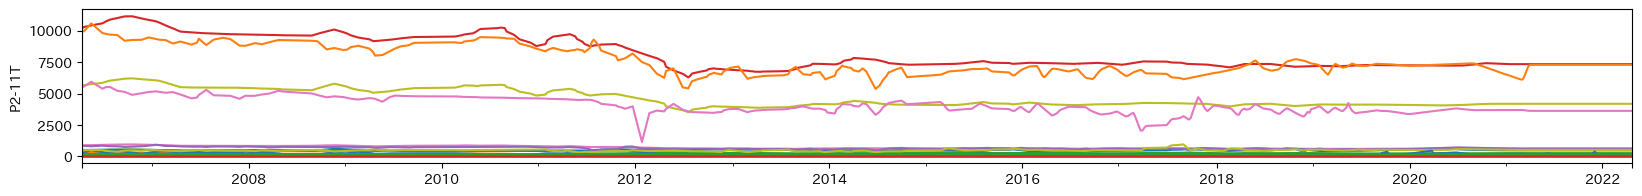

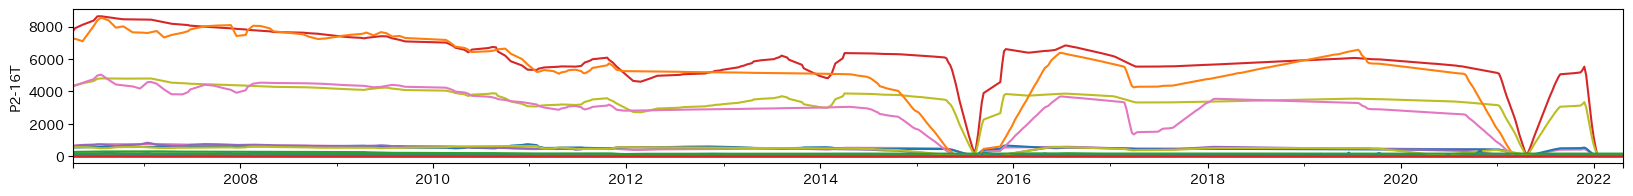

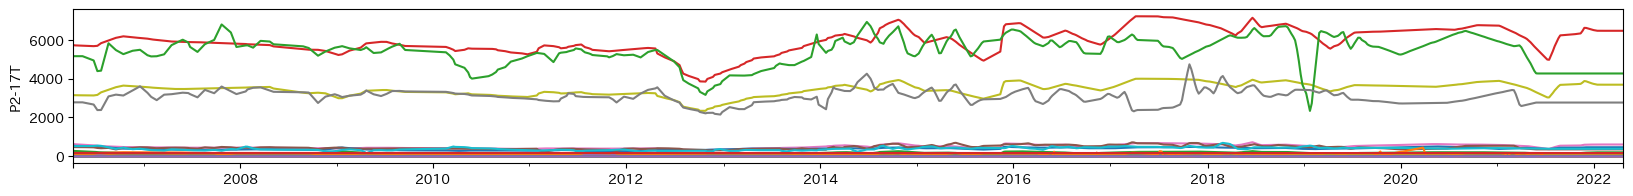

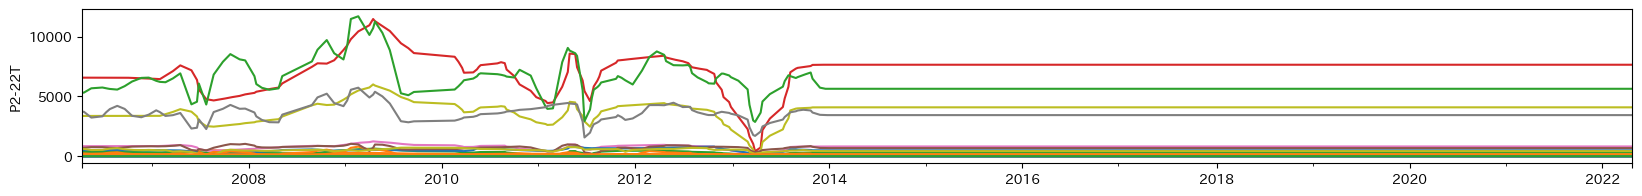

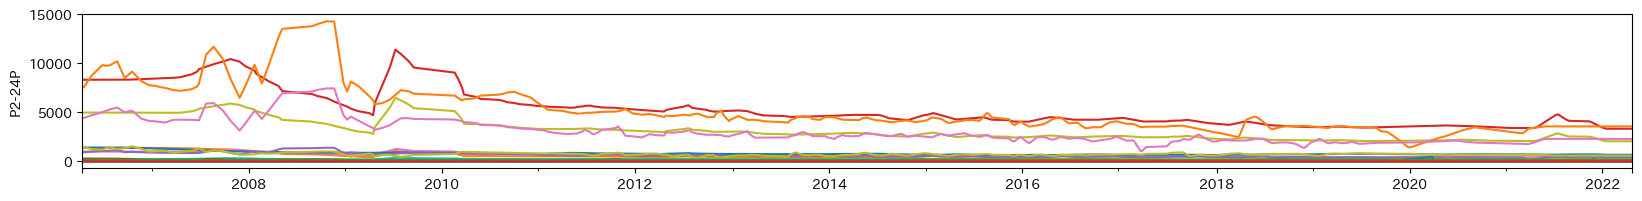

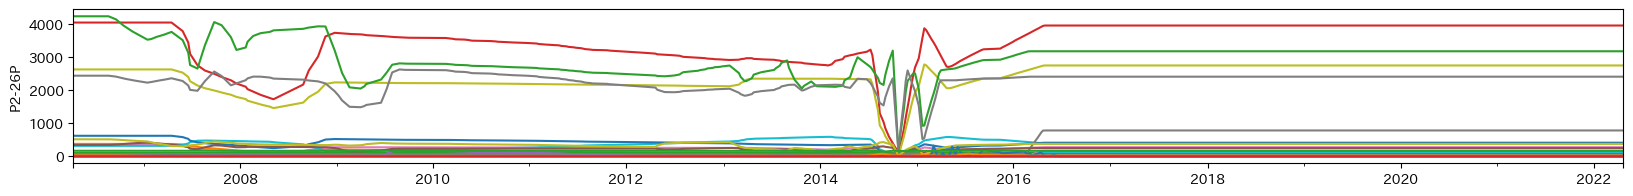

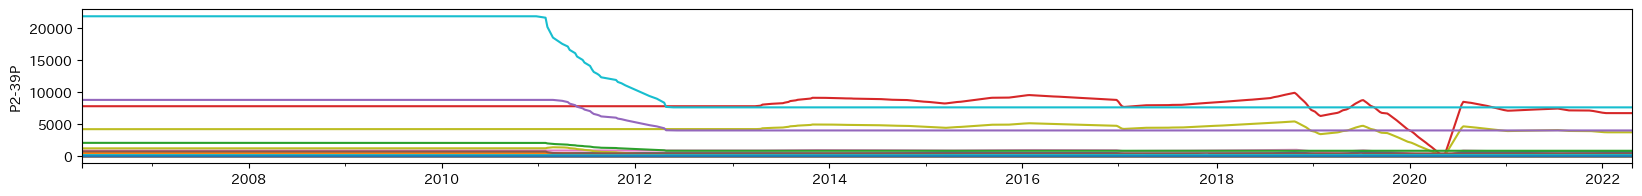

In [11]:
# 時系列を作図する関数
def my_draw(df_i_z, well):
  ax = df_i_z.loc[:, well].plot(figsize=(20,2), legend = False )
  ax.set(ylabel = well, xlabel="" )

# 各井戸に関してループ
for well in wells:
  my_draw(df_i_z, well)

In [12]:
# 参考までに、変数を標準化し、作図する
meanX = np.mean(df_i_z, axis = 0)
stdX = np.std(df_i_z, axis = 0, ddof = 1)
df_i_z_scale = (df_i_z - meanX) / stdX

# 各井戸に関してループ
for well in wells:
  my_draw(df_i_z_scale, well)

Output hidden; open in https://colab.research.google.com to view.

In [13]:
print(stdX.isnull().sum()) # 標準偏差が計算できなかった変数は 0個 らしい。
print(meanX.isnull().sum()) # 平均が　　〃　　　　　　　　   0個 らしい。

0
0


<Axes: xlabel='変数'>

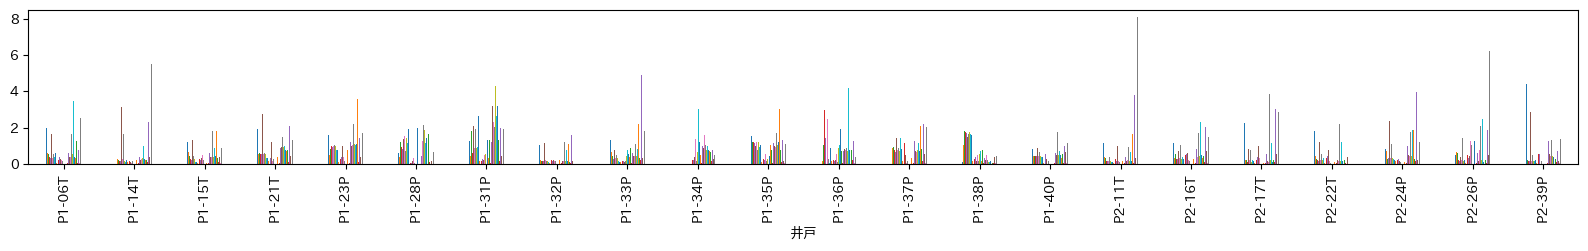

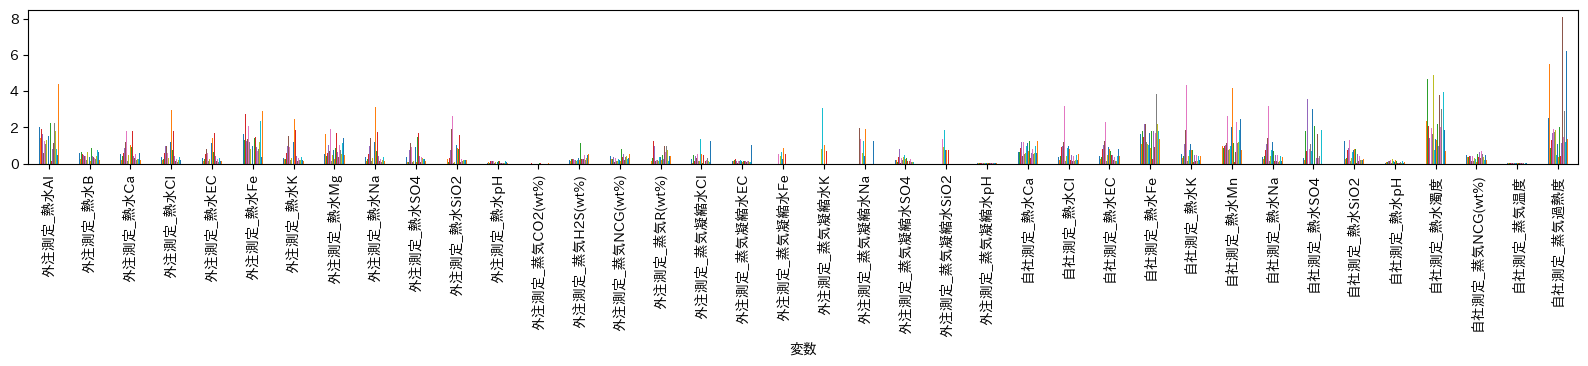

In [14]:
# 平均で基準化した標準偏差（参考）
abs(stdX/meanX).unstack().plot.bar(figsize=(20,2), legend = False)
abs(stdX/meanX).unstack().transpose().plot.bar(figsize=(20,2), legend = False)

In [17]:
##
## セグメントデータを読み出し、各セグメント時系列を書き出し
##

# セグメントデータの読み出し
segments = pd.read_csv('segment_data.csv',
                      index_col = "Well",
                      parse_dates = True )

segments.columns

# 列名に余分なスペースがあるので修正
columns = []
for element in segments.columns:
  columns.append(' '.join(element.split()))

segments.columns = columns
segments.columns

<ipython-input-17-a88a445e8d0a>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  segments = pd.read_csv('segment_data.csv',


Index(['#', 'Start time', 'End time', 'Interval'], dtype='object')

In [18]:
segments.loc['06T', :]

,#,Start time,End time,Interval
Well,,,,
06T,1,2006-07-01 00:00:00,2006-09-21 16:00:00,2m 20d 16H 0M 0S
06T,2,2006-11-07 14:45:00,2007-12-20 09:55:00,1y 1m 12d 19H 10M 0S
06T,3,2007-12-26 15:35:00,2008-02-20 13:50:00,1m 24d 22H 15M 0S
06T,4,2008-02-29 15:05:00,2008-05-21 10:55:00,2m 21d 19H 50M 0S
06T,5,2008-08-12 16:35:00,2008-09-26 15:05:00,1m 13d 22H 30M 0S
06T,6,2008-10-07 14:40:00,2008-11-26 15:00:00,1m 19d 0H 20M 0S
06T,7,2008-12-25 13:50:00,2009-01-09 17:35:00,15d 3H 45M 0S
06T,8,2009-01-13 12:05:00,2009-01-31 07:55:00,17d 19H 50M 0S
06T,9,2009-02-24 14:00:00,2009-03-07 10:20:00,10d 20H 20M 0S


In [19]:
# 井戸ごとにセグメントがそれぞれいくつあるのか取得
max(segments.loc['06T', '#'])

# 関数化
def number_of_segments(well):
  return max(segments.loc[well[-3:], '#'])

for well in wells:
  print(well, number_of_segments(well[-3:]))


P1-06T 39
P1-14T 25
P1-15T 31
P1-21T 20
P1-23P 29
P1-28P 15
P1-31P 37
P1-32P 12
P1-33P 28
P1-34P 51
P1-35P 28
P1-36P 28
P1-37P 50
P1-38P 8
P1-40P 25
P2-11T 38
P2-16T 26
P2-17T 47
P2-22T 14
P2-24P 21
P2-26P 38
P2-39P 10


In [20]:
# 指定井戸、指定番号のセグメントの開始時刻(Start time)、終了時刻(End time)を取り出す：
well = '06T'
segment = 2

Start = segments.loc[well, 'Start time'].iloc[segment-1]  # pythonは０開始なので１引いている
End   = segments.loc[well, 'End time'].iloc[segment-1]

print(Start, End)

# 関数化
def extract_segment(well, segment):
  Start = segments.loc[well, 'Start time'].iloc[segment-1]  # pythonは０開始なので１引いている
  End   = segments.loc[well, 'End time'].iloc[segment-1]
  return Start, End

print(extract_segment('06T', 2))
Start, End = extract_segment('06T', 2)

2006-11-07 14:45:00 2007-12-20 09:55:00
('2006-11-07 14:45:00', '2007-12-20 09:55:00')


In [21]:
wells

array(['P1-06T', 'P1-14T', 'P1-15T', 'P1-21T', 'P1-23P', 'P1-28P',
       'P1-31P', 'P1-32P', 'P1-33P', 'P1-34P', 'P1-35P', 'P1-36P',
       'P1-37P', 'P1-38P', 'P1-40P', 'P2-11T', 'P2-16T', 'P2-17T',
       'P2-22T', 'P2-24P', 'P2-26P', 'P2-39P'], dtype='<U6')

In [22]:
well = [x for x in wells if x.endswith(well)]
print(well)

['P1-06T']


In [25]:
# セグメントごとの処理後時系列を、 by_segment/*****.csv  に書き出し

os.chdir("/content/drive/MyDrive/Colab Notebooks/地熱2/by_segment")

for well in wells:
  for segment in range(1, number_of_segments(well)+1):

    # 指定井戸、指定期間の時系列を切り出して、書き出し
    Start, End = extract_segment(well[-3:], segment)
    csv_out = df_i_z.loc[Start:End, well]

    # 図示して確認
    # my_draw(csv_out, well)  ## ここ well名の不具合が理由で引っかかる

    # csvファイルに書き出し
    file_name = well + "_S" + "{:02d}".format( segment ) + ".csv"
    csv_out.to_csv(file_name)



In [ ]:
# 不要なファイルを消す
# from os import listdir

# files_to_delete = [f for f in listdir() if f.startswith("P")]
# print(files_to_delete)

# for file in files_to_delete:
#     os.remove(file)